---
# $Breast Cancer Wisconsin (Diagnosis) Dataset$
### Dataset Information:
- https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
- https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

---

# I. Exploring the Data Analysis

In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_theme()


### 1. Import Data - Breast Cancer Wisconsin (Diagnosis)

Features are computed from a digitized CT Scan image of a needle aspirate (FNA) of a breast mass. Those features describe the characteristic of the cell nuclei present in the image.

In [159]:
df = pd.read_csv("data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

*Features:*
1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

*The real-valued features are computed for each cell nucleus:*
1) radius (mean of distances from center to points on the perimeter)
2) texture (standard deviation of gray-scale values)
3) perimeter
4) area
5) smoothness (local variation in radius lengths)
6) compactness (perimeter^2 / area - 1.0)
7) concavity (severity of concave portions of the contour)
8) concave points (number of concave portions of the contour)
9) symmetry
10) fractal dimension ("coastline approximation" - 1)

Each of these valued feature has its own 'mean', 'standard error', and 'worst'.

<AxesSubplot:>

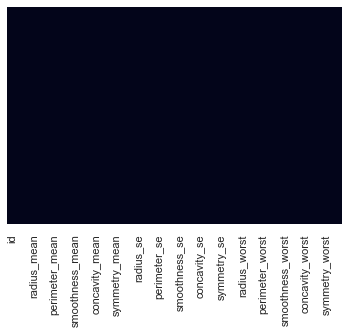

In [160]:
sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False)

For better work on this project, we should look at the correlation between those feature. 

In [161]:
df = df.dropna(axis='columns')
df = df.drop('id', axis = 1)
# sns.pairplot(df, hue = 'diagnosis')



### 2. Apply Principal Component Analysis (PCA)
However, we still using one of important techniques in Machine Learning for Dimensionality Reduction. Because the Feature vector in this dataset have a very large dimensions (up to 30 dimensions), and in addition the number of data points are often large. So if we perform storage and computation directly on data of this height, it will be difficult both in terms of storage and computation speed. Therefore, reducing the data dimension is an important step.

The techniques we use is call PCA, This method is based on the observation that the data are not normally distributed randomly in space but are often distributed near certain special lines/surfaces. PCA considers a special case where such special faces have linear form as subspaces.



In [162]:
X = df.drop('diagnosis', axis = 1).to_numpy()
y = df['diagnosis'].to_numpy()



#### PCA works:
step1: Standardize (center and scale) the data

step2: Compute the covariance or correlation matrix (S)

In [163]:
A = X - X.mean(axis = 0)

U, sigma, Vt = np.linalg.svd(A, full_matrices=False)

print(f"np.shape(U) = {np.shape(U)}")
print(f"np.shape(sigma) = {np.shape(sigma)}")
print(f"np.shape(Vt) = {np.shape(Vt)} \n")

np.shape(U) = (569, 30)
np.shape(sigma) = (30,)
np.shape(Vt) = (30, 30) 



step3: Find the Eigenvalues and orthonormal eigenvector of S

In [164]:
sigma_mat = np.diag(sigma)
print(f"A == U * sigma_mat * Vt: {np.allclose(A, np.dot(U, np.dot(sigma_mat, Vt)))} \n")

A == U * sigma_mat * Vt: True 



step4: Find the principle components, and then reduce the dimension of the data

In [165]:
i = 1
for n in range(0, 30):
    globals()["PC" + str(i)] = Vt.T[:, n]
    i += 1

W3 = Vt.T[:, :3]
X3D = A.dot(W3)
X3D

array([[-1160.1425737 ,  -293.91754364,   -48.57839763],
       [-1269.12244319,    15.63018184,    35.39453423],
       [ -995.79388896,    39.15674324,     1.70975298],
       ...,
       [ -314.50175618,    47.55352518,    10.44240718],
       [-1124.85811531,    34.12922497,    19.74208742],
       [  771.52762188,   -88.64310636,   -23.88903189]])

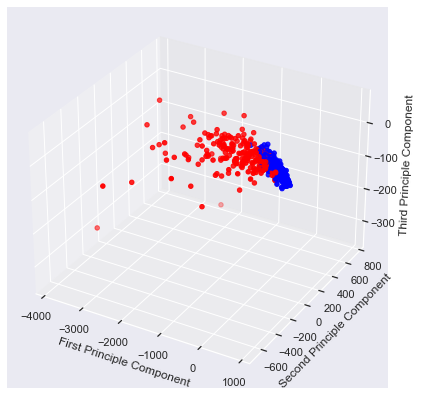

In [166]:
def colors(y):
    if y == "B":
        return "blue"
    else:
        return "red"

c = [colors(label) for label in y]

# Create the 3D plot
fig = plt.figure(plt.figure(figsize = (10, 7)))
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_zlabel("Third Principle Component")

ax.scatter(X3D[:, 0], X3D[:, 1], X3D[:, 2], c = c)

plt.show()




#### PCA - scikit_Learn

In [167]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

scaled_X = preprocessing.scale(X)
pca = PCA()
pca.fit(scaled_X)
# x_new = pca.fit_transform(X)

print(f"pca.explained_variance_ratio_ = \n {pca.explained_variance_ratio_}")  #eigenValues 

per_var = np.round(pca.explained_variance_ratio_*100, 2)
print(f"per_var = \n {per_var} \n")

pca.explained_variance_ratio_ = 
 [4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]
per_var = 
 [4.427e+01 1.897e+01 9.390e+00 6.600e+00 5.500e+00 4.020e+00 2.250e+00
 1.590e+00 1.390e+00 1.170e+00 9.800e-01 8.700e-01 8.000e-01 5.200e-01
 3.100e-01 2.700e-01 2.000e-01 1.800e-01 1.600e-01 1.000e-01 1.000e-01
 9.000e-02 8.000e-02 6.000e-02 5.000e-02 3.000e-02 2.000e-02 1.000e-02
 0.000e+00 0.000e+00] 



Text(0.5, 1.0, 'Cumulative explained variance by number of principal components')

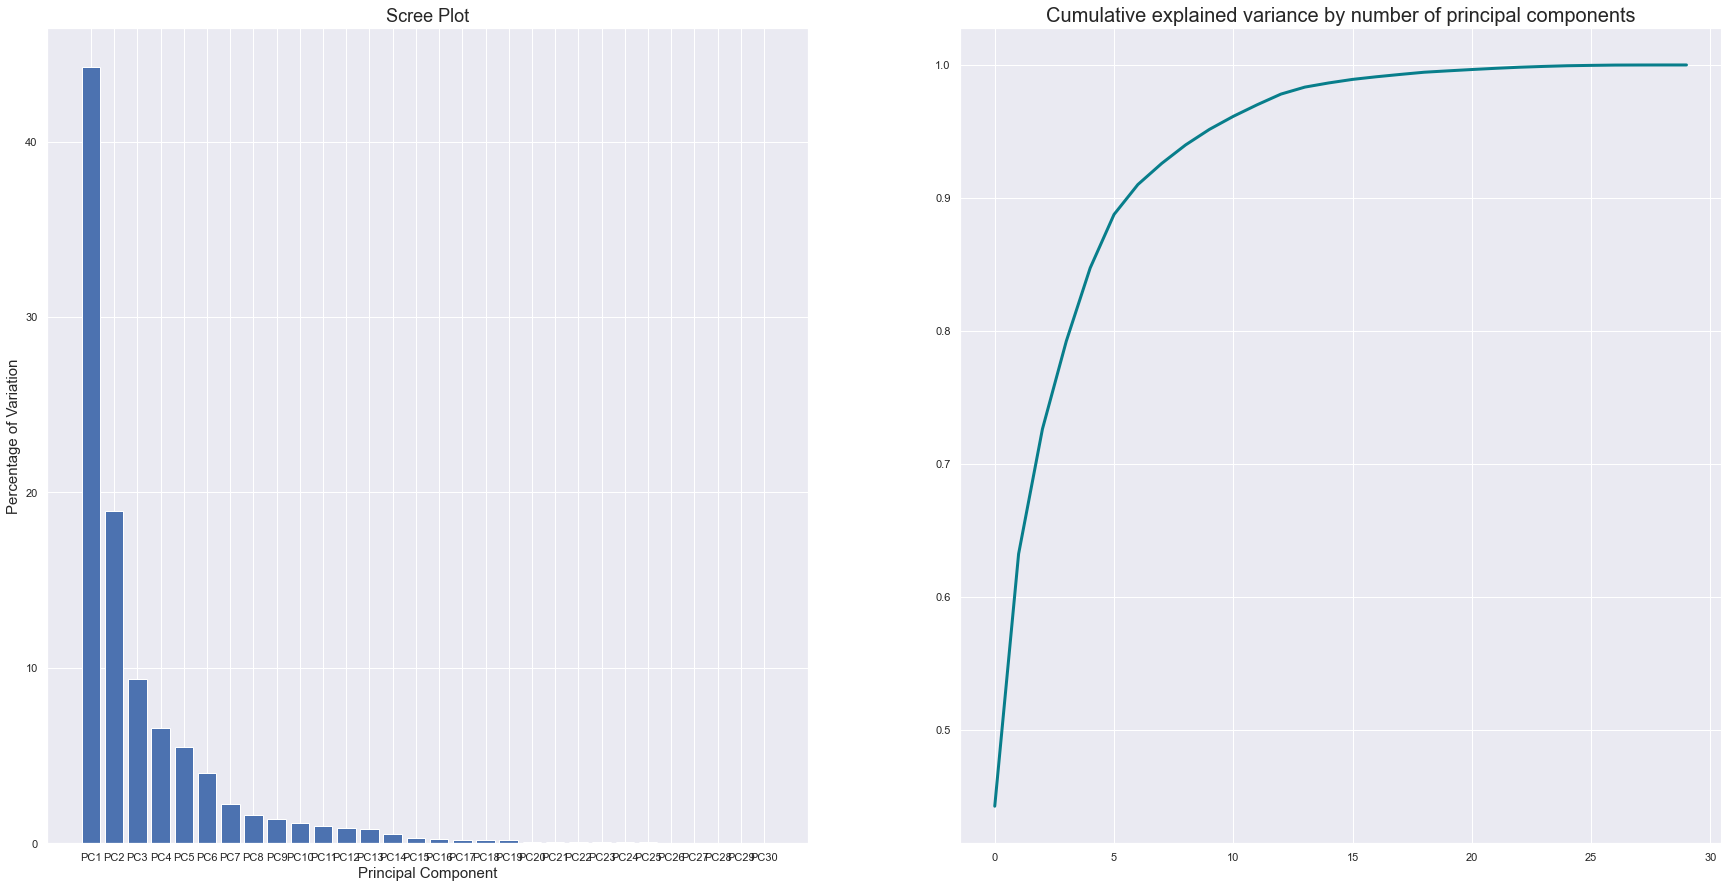

In [168]:
# Create a bar chart for the above array
# This chart is called a "Scree Plot"

labels = [f"PC{i}" for i in range(1,31)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,15))

ax1.bar(x = range(1, 31), height = per_var, tick_label = labels)
ax1.set_xlabel('Principal Component', fontsize = 15)
ax1.set_ylabel('Percentage of Variation', fontsize = 15)
ax1.set_title('Scree Plot', fontsize = 18)

ax2.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
ax2.set_title('Cumulative explained variance by number of principal components', size=20)


After completing the principal component calculation, and fitting the PCA to the X scaled, we can explain 90% of the variance in our source dataset coming from the first five PCs

Now, we can discover how each PC can be obtained using the original coordinate, and alos discover which features are the most important or contribute in the data

In [169]:
# To know better how each PC can be obtained using the original coordinates
# Example: PC1 = 0.219 * mean radius - 0.234 * mean texture -0.008531 * perimeter_mean...

features = list(df.drop('diagnosis', axis = 1).columns)
PC_work = pd.DataFrame(data = pca.components_, columns = labels, index = features)
PC_work.head()

# To discover which feature is most important or most contribute in the data, we need to deal with PCA loading

PC_loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(features) + 1)],
    index=features
)
PC_loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
radius_mean,0.798469,-0.558394,-0.014334,0.058328,0.048561,0.020610,-0.102055,-0.005149,-0.144183,0.056596,...,-0.011882,0.012091,-0.015389,0.024555,0.002394,-0.011719,-0.010935,0.008427,0.005792,-0.008109
texture_mean,0.378346,-0.142564,0.108454,-0.849451,-0.063575,-0.035389,0.009375,0.090294,0.072831,0.142805,...,0.077693,0.015717,-0.000087,-0.013286,-0.010554,-0.002223,-0.001443,-0.000003,-0.000289,-0.000003
perimeter_mean,0.829965,-0.513800,-0.015649,0.059137,0.048032,0.019035,-0.094151,-0.012913,-0.144590,0.051202,...,-0.012090,0.012461,-0.006284,0.015688,-0.003364,-0.011337,-0.009596,0.003365,0.010512,0.007965
area_mean,0.806101,-0.551755,0.048220,0.075266,0.013277,-0.002076,-0.042482,0.023959,-0.126396,0.044428,...,-0.003196,0.016176,0.001214,-0.009394,0.026157,0.032830,0.038795,-0.010874,-0.011580,0.000380
smoothness_mean,0.520110,0.444392,-0.175226,0.224505,-0.469197,-0.314945,-0.115692,-0.199676,0.004152,-0.041071,...,-0.020705,0.010581,-0.003227,-0.009239,-0.003606,-0.003349,0.005794,0.000059,-0.000094,0.000056


C:\Users\Thanh La\AppData\Local\Temp\ipykernel_18276\1389785986.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(pc1_loadings['Attribute'], rotation=90, ha='right', rotation_mode='anchor')
C:\Users\Thanh La\AppData\Local\Temp\ipykernel_18276\1389785986.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(pc2_loadings['Attribute'], rotation=90, ha='right', rotation_mode='anchor')


[Text(0, 0, 'fractal_dimension_mean'),
 Text(1, 0, 'fractal_dimension_se'),
 Text(2, 0, 'fractal_dimension_worst'),
 Text(3, 0, 'compactness_se'),
 Text(4, 0, 'smoothness_se'),
 Text(5, 0, 'concavity_se'),
 Text(6, 0, 'symmetry_mean'),
 Text(7, 0, 'smoothness_mean'),
 Text(8, 0, 'symmetry_se'),
 Text(9, 0, 'smoothness_worst'),
 Text(10, 0, 'compactness_mean'),
 Text(11, 0, 'compactness_worst'),
 Text(12, 0, 'symmetry_worst'),
 Text(13, 0, 'concave points_se'),
 Text(14, 0, 'concavity_worst'),
 Text(15, 0, 'texture_se'),
 Text(16, 0, 'concavity_mean'),
 Text(17, 0, 'concave points_worst'),
 Text(18, 0, 'concave points_mean'),
 Text(19, 0, 'texture_worst'),
 Text(20, 0, 'texture_mean'),
 Text(21, 0, 'perimeter_se'),
 Text(22, 0, 'radius_se'),
 Text(23, 0, 'area_se'),
 Text(24, 0, 'perimeter_worst'),
 Text(25, 0, 'perimeter_mean'),
 Text(26, 0, 'area_worst'),
 Text(27, 0, 'radius_worst'),
 Text(28, 0, 'area_mean'),
 Text(29, 0, 'radius_mean')]

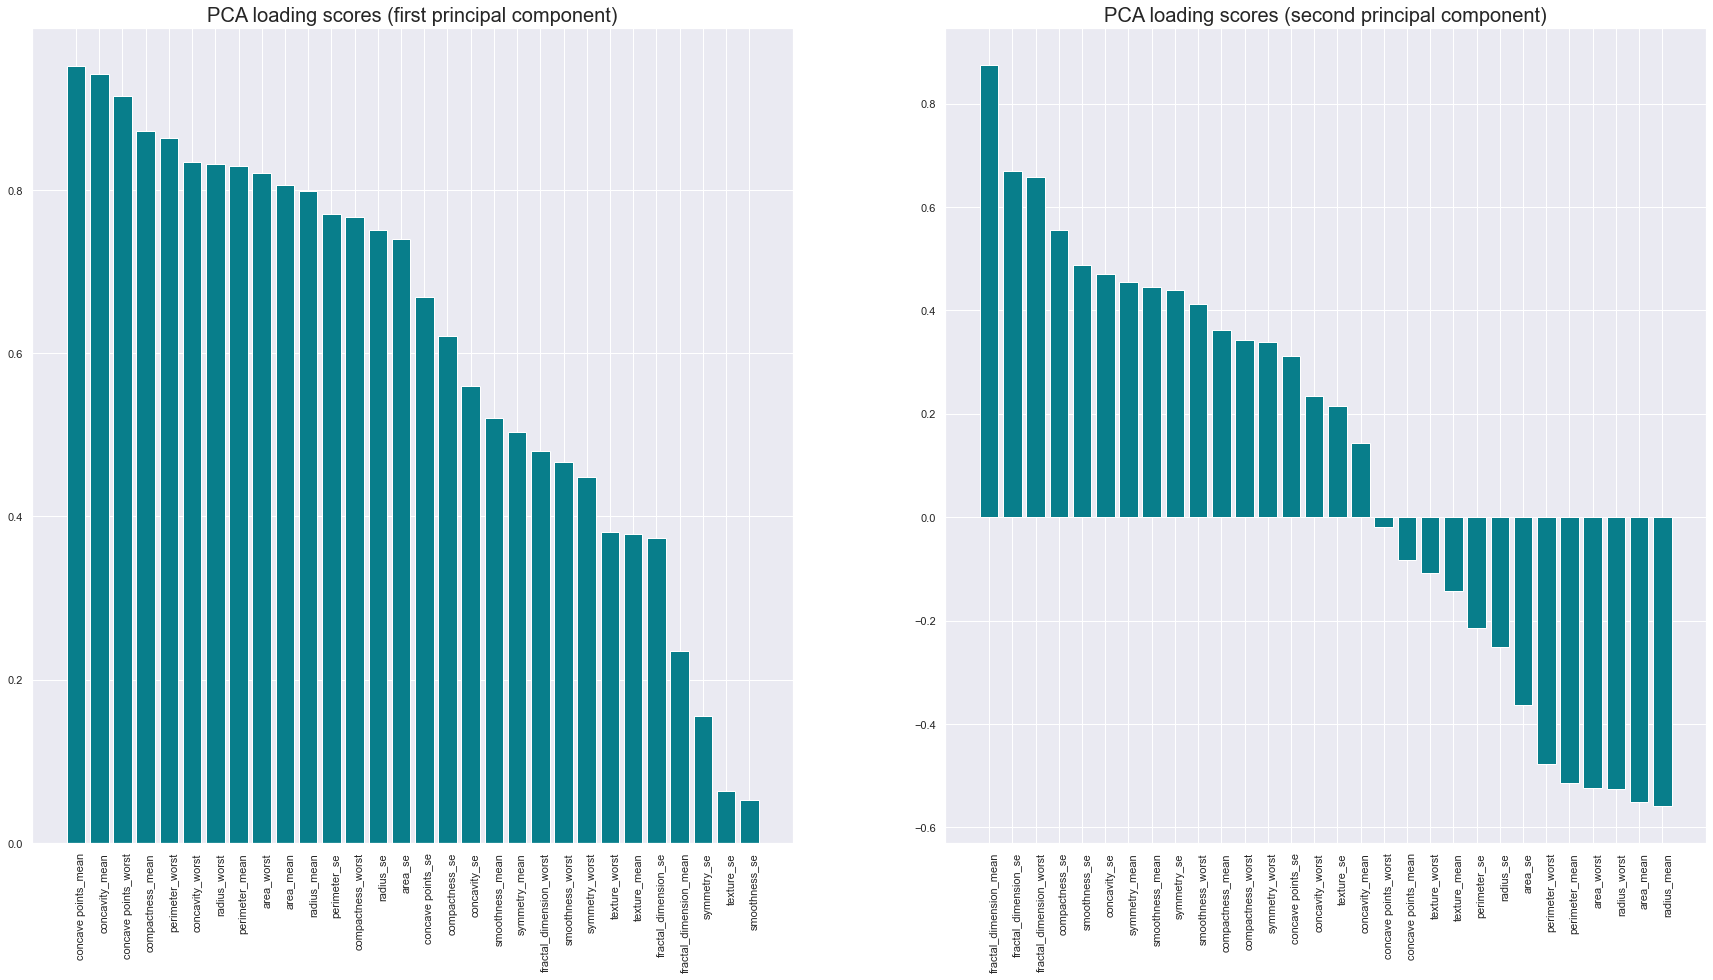

In [170]:
pc1_loadings = PC_loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

pc2_loadings = PC_loadings.sort_values(by='PC2', ascending=False)[['PC2']]
pc2_loadings = pc2_loadings.reset_index()
pc2_loadings.columns = ['Attribute', 'CorrelationWithPC2']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,15))
ax1.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
ax1.set_title('PCA loading scores (first principal component)', size=20)
ax1.set_xticklabels(pc1_loadings['Attribute'], rotation=90, ha='right', rotation_mode='anchor')

ax2.bar(x=pc2_loadings['Attribute'], height=pc2_loadings['CorrelationWithPC2'], color='#087E8B')
ax2.set_title('PCA loading scores (second principal component)', size=20)
ax2.set_xticklabels(pc2_loadings['Attribute'], rotation=90, ha='right', rotation_mode='anchor')


In [171]:
# we use pca.transform to see how our data looks like in the new coordinate system
# this will be used later to plot our data in the coordinates PC1, PC2, PC3
pca_data = pca.transform(scaled_X)
pca_df = pd.DataFrame(pca_data, columns = labels)
projected_df = pd.concat([pca_df, df['diagnosis']], axis = 1)
projected_df["color"] = c
projected_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,diagnosis,color
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,...,0.084519,-0.175256,-0.151020,-0.201503,-0.252585,-0.033914,0.045648,-0.047169,M,red
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,...,-0.217718,0.011290,-0.170510,-0.041129,0.181270,0.032624,-0.005687,-0.001868,M,red
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,...,-0.074291,0.102762,0.171158,0.004735,0.049569,0.047026,0.003146,0.000751,M,red
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,...,-0.124105,0.153430,0.077496,-0.275225,0.183462,0.042484,-0.069295,-0.019937,M,red
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,...,0.139454,-0.005332,0.003062,0.039254,0.032168,-0.034786,0.005038,0.021214,M,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,...,0.088590,0.107898,0.219520,-0.122900,0.159198,0.009853,0.007119,-0.001415,M,red
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,...,-0.055405,0.086135,0.001197,0.065889,-0.068512,-0.023575,-0.027486,-0.010419,M,red
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,...,-0.200312,-0.044819,0.002429,0.007095,-0.023691,-0.002578,0.006706,0.003770,M,red
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296,...,0.168820,-0.195969,0.377830,-0.198192,-0.027409,-0.068086,-0.084163,-0.023783,M,red


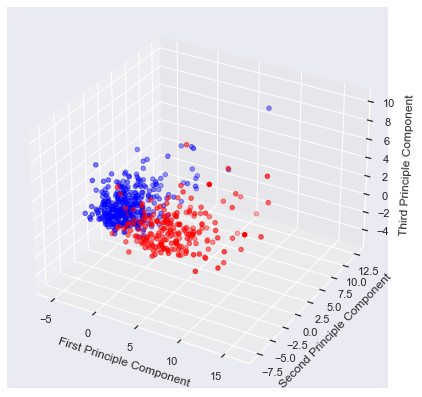

In [172]:
# Create the 3D plot
fig = plt.figure(plt.figure(figsize = (10, 7)))
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_zlabel("Third Principle Component")

ax.scatter(pca_df.PC1, pca_df.PC2, pca_df.PC3, c = c)

plt.show()

As we can see from the PCA loading and the coefficients the original variable above, the correlation between it and the Radius Mean is around 0.8, so we can consider that is a strong correlation. Not only the Radius Mean, we also have much more feature above 0.8, so I will use those features as the feature as a predictor for Machine Learning in this project.

In [173]:
pc1_loadings = pc1_loadings[pc1_loadings['CorrelationWithPC1'] > 0.8]
pc1_feature = list(pc1_loadings.Attribute)
pc2_loadings = pc2_loadings[pc2_loadings['CorrelationWithPC2'] > 0.8]
pc2_feature = list(pc2_loadings.Attribute)

use_feature = list(['diagnosis'] + pc1_feature + pc2_feature)
use_feature

df = df[use_feature]

---

In [174]:
df.to_csv('df_workfile.csv')  
